# Assignment 3. Analysis of flood data

![Jesus Green lock](res/jesus_green_lock.jpg)

This assignment asks you to analyse data provided by the UK Environment Agency concerning flooding. The agency offers an [API for near real-time data](http://environment.data.gov.uk/flood-monitoring/doc/reference) covering:
* flood warnings and flood alerts
* flood areas which to which warnings or alerts apply
* measurements of water levels and flows
* information on the monitoring stations providing those measurements

In this assignment we will be working with historical data of water level measurements, at several monitoring stations in Cambridge and on the Cam. The dataset is available as a CSV file at [https://teachingfiles.blob.core.windows.net/scicomp/flood.csv](https://teachingfiles.blob.core.windows.net/scicomp/flood.csv). If you go home over Christmas and are worried about flooding, and want to extend these analyses to your home area, see [A3. Data import and cleanup](A3.%20Data%20import%20and%20cleanup.ipynb) for details of how to fetch data from a web API.

_Image by [N. Chadwick](http://www.geograph.org.uk/photo/4800494)._

<div class="alert alert-warning">**Goal of the assignment.** 
    This assignment tests your skill at manipulating dataframes and indexed arrays, and your flair at plotting data.
    You should use Pandas and numpy operations for data manipulation, rather than <code style="background-color:inherit">for</code> loops,
    wherever possible. You can organize your code however you like. Please create a new notebook for your answers to this assignment.
</div>

# Part A
This section is worth 1 mark. Check your answers as described in [&sect;0.3](0.%20About%20this%20course.ipynb#grader) using `section='assignment3a'`.

In [1]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 

In [237]:
!pip install ucamcl --upgrade
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment3a')
# paste in whatever section is appropriate for the section of notes / assignment you're working on

Waiting for you to log in ....... done.


**Question 1.** Import the CSV file and print out a few lines, choosing the lines at random using `np.random.choice`. The file mistakenly includes the village Cam, near Bristol. Remove these rows, and store what's as the variable `flood`. How many rows are left?
```
# Submit your answer:
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)
```

In [3]:
floods = pandas.read_csv('flood.csv')
for i in range(4):
    i = np.random.choice(len(floods),1)
    print(floods[['label','town','river']].iloc[i])
rows = floods['town'] != 'Cam'
flood = floods.loc[rows]
GRADER.submit_answer(GRADER.fetch_question('q1'), len(flood))

                  label              town      river
10614  Weston Bampfylde  Weston Bampfylde  River Cam
      label town      river
15979   Cam  Cam  River Cam
                      label    town      river
15154  Cambridge Baits Bite  Milton  River Cam
         label            town      river
4227  Dernford  Great Shelford  River Cam
Correct!


(True, 15890)

**Question 2.** Complete this table of the number of entries in this dataset for each town and river.

|  | Cambridge | Great Shelford | Milton | Weston Bampfylde
| -------
| **Bin Brook** | 2665 | 0
| **River Cam**

```
# Submit your answer, as an unstacked indexed array:
GRADER.submit_answer(GRADER.fetch_question('q2'), your_answer.as_matrix())
```

In [4]:
x = flood.groupby(['river','town']).apply(len)
x = x.unstack(fill_value = 0).as_matrix().tolist()
GRADER.submit_answer(GRADER.fetch_question('q2'), x)

Correct!


(True, [[2665, 0, 0, 0], [5298, 2617, 2653, 2657]])

**Question 3.** Each measurement station has a unique `measure_id` and `label`. Complete this table of the number of measurement stations for each town and river. Use only the Pandas operations for split-apply-combine, don't use any numpy operations or Python `for` loops or list comprehensions. 

| | Cambridge | Great Shelford | Milton | Weston Bampylde
|-----
| **Bin Brook** | 1 | 0
| **River Cam**

```
# Submit your answer. Let your_answer be an unstacked indexed array.
GRADER.submit_answer(GRADER.fetch_question('q3'), your_answer.as_matrix())
```

In [5]:
result = flood.groupby(['river', 'town'])['measure_id'].nunique().unstack(fill_value=0).as_matrix().tolist()
GRADER.submit_answer(GRADER.fetch_question('q3'), result)

Correct!


(True, [[1, 0, 0, 0], [2, 1, 1, 1]])

**Question 4.** 
Each measurement station has low and high reference levels, in columns `low` and `high`. In this dataset, the reference levels are stored for every measurement, but we can verify that every `measure_id` has a unique pair `(low,high)` with
```
assert all(flood.groupby(['measure_id','low','high']).apply(len).groupby('measure_id').apply(len) == 1), "Reference levels non-constant"
```
Add a column `norm_value`, by rescaling `value` linearly so that `value=low` correponds to `norm_value=0` and `value=high` corresponds to `norm_value=1`.
Use `np.nanpercentile` to find the [_tercile points_](https://en.wiktionary.org/wiki/tercile), the two values that split the entire `norm_value` column into three roughly equal parts.

```
# Submit your answer:
GRADER.submit_answer(GRADER.fetch_question('q4'), [tercile1, tercile2])
```

In [6]:
#axis=1 applies the function to each row
flood['norm_value']=flood.apply(lambda x: (x['value'] - x['low']) / (x['high'] - x['low']), axis=1)
listF = flood['norm_value'].as_matrix().tolist()
terciles = [np.nanpercentile(listF, 100/3), np.nanpercentile(listF, 200/3)]
GRADER.submit_answer(GRADER.fetch_question('q4'), terciles)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Correct!


(True, [0.036970243462578906, 0.31511254019292606])

**Question 5.** Complete the following dataframe, listing the number of observations in each tercile and the total number of observations per station.

| label | norm_value_tercile | n | ntot
|----
| Bin Brook | low | 19 | 2665
| Bin Brook | med | 1653 | 2665
| Bin Brook | high | 993 | 2665
| Cambridge Jesus Lock | high | 1906 | 2651

```
# Submit your answer:
assert np.array_equal(your_dataframe.columns, ['label','norm_value_tercile','n','ntot']), 'columns are wrong'
GRADER.submit_answer(GRADER.fetch_question('q5'), your_dataframe)
```
<div class="alert alert-info">
Update on 2017-12-09: When submitting a dataframe, please make sure that the columns have the names and order shown. The rows can be in any order.
</div>

In [106]:
df = pandas.DataFrame(columns = ['label', 'norm_value','norm_value_tercile', 'n', 'ntot'])
df['label']=flood['label']
df['norm_value']=flood['norm_value']
#Get rid of Nan values
df = df[np.isfinite(df['norm_value'])]
df['norm_value_tercile']=df['norm_value'].map(
    lambda x : 'low' if x <= terciles[0] else ('med' if x <= terciles[1] 
                                               else 'high' ))
df = df.groupby(['label','norm_value_tercile']).apply(len).reset_index(name='n')
y = df.groupby('label')['n'].apply(sum).reset_index(name='ntot')
z = df.merge(y, on='label')
print(z)
GRADER.submit_answer(GRADER.fetch_question('q5'), z)

                   label norm_value_tercile     n  ntot
0              Bin Brook               high   993  2665
1              Bin Brook                low    19  2665
2              Bin Brook                med  1653  2665
3              Cambridge                low  2132  2645
4              Cambridge                med   513  2645
5   Cambridge Baits Bite               high  2285  2653
6   Cambridge Baits Bite                low     4  2653
7   Cambridge Baits Bite                med   364  2653
8   Cambridge Jesus Lock               high  1906  2651
9   Cambridge Jesus Lock                low    14  2651
10  Cambridge Jesus Lock                med   731  2651
11              Dernford               high    69  2617
12              Dernford                low  2469  2617
13              Dernford                med    79  2617
14      Weston Bampfylde                low   672  2657
15      Weston Bampfylde                med  1985  2657
Correct!


(True,
 [{'label': 'Bin Brook', 'n': 19, 'norm_value_tercile': 'low', 'ntot': 2665},
  {'label': 'Bin Brook', 'n': 1653, 'norm_value_tercile': 'med', 'ntot': 2665},
  {'label': 'Bin Brook', 'n': 993, 'norm_value_tercile': 'high', 'ntot': 2665},
  {'label': 'Cambridge', 'n': 2132, 'norm_value_tercile': 'low', 'ntot': 2645},
  {'label': 'Cambridge', 'n': 513, 'norm_value_tercile': 'med', 'ntot': 2645},
  {'label': 'Cambridge Baits Bite',
   'n': 4,
   'norm_value_tercile': 'low',
   'ntot': 2653},
  {'label': 'Cambridge Baits Bite',
   'n': 364,
   'norm_value_tercile': 'med',
   'ntot': 2653},
  {'label': 'Cambridge Baits Bite',
   'n': 2285,
   'norm_value_tercile': 'high',
   'ntot': 2653},
  {'label': 'Cambridge Jesus Lock',
   'n': 14,
   'norm_value_tercile': 'low',
   'ntot': 2651},
  {'label': 'Cambridge Jesus Lock',
   'n': 731,
   'norm_value_tercile': 'med',
   'ntot': 2651},
  {'label': 'Cambridge Jesus Lock',
   'n': 1906,
   'norm_value_tercile': 'high',
   'ntot': 2651},
 

**Question 6.** Complete this dataframe listing the fraction of observations in each tercile per station:

| label | low | med | high
|----
| Bin Brook | 0.007 | 0.620 | 0.373
| Cambridge | 0.807 | 0.194 | 0.000

```
# Submit your answer:
assert np.array_equal(your_dataframe.columns, ['label','low','med','high']), 'columns are wrong'
GRADER.submit_answer(GRADER.fetch_question('q6'), your_dataframe)
```

In [260]:
dfFract = pandas.DataFrame(columns = ['label', 'low','med', 'high'])
dfFract['label'] = z['label']
dfFract['low'] = z.loc[z['norm_value_tercile'] == 'low']['n']/z['ntot']
dfFract['med'] = z.loc[z['norm_value_tercile'] == 'med']['n']/z['ntot']
dfFract['high'] = z.loc[z['norm_value_tercile'] == 'high']['n']/z['ntot']
test = dfFract.groupby(['label','low']).apply(len).reset_index()
low = dfFract.groupby(['label','low']).apply(len).reset_index()
med = dfFract.groupby(['label','med']).apply(len).reset_index()
high = dfFract.groupby(['label','high']).apply(len).reset_index()
temp = pandas.merge(low, med,  on='label')
b = pandas.merge(temp, high, how = 'left',on='label')
b = b[['label','low','med','high']].fillna(0)
assert np.array_equal(b.columns, ['label','low','med','high']), 'columns are wrong'
GRADER.submit_answer(GRADER.fetch_question('q6'), b)

Correct!


(True,
 [{'high': 0.3726078799249531,
   'label': 'Bin Brook',
   'low': 0.007129455909943715,
   'med': 0.6202626641651032},
  {'high': 0.0,
   'label': 'Cambridge',
   'low': 0.8060491493383742,
   'med': 0.1939508506616257},
  {'high': 0.8612891066716925,
   'label': 'Cambridge Baits Bite',
   'low': 0.0015077271013946476,
   'med': 0.13720316622691292},
  {'high': 0.7189739720860053,
   'label': 'Cambridge Jesus Lock',
   'low': 0.005281026027913994,
   'med': 0.2757450018860807},
  {'high': 0.026366068016813144,
   'label': 'Dernford',
   'low': 0.9434466946885747,
   'med': 0.030187237294612153},
  {'high': 0.0,
   'label': 'Weston Bampfylde',
   'low': 0.2529168234851336,
   'med': 0.7470831765148664}])

**Question 7.** Fill in the rest of this indexed array, giving the `low` and `high` values for each measurement station:

| label | ref | |
|----
| Bin Brook | high | 0.368
| | low | 0.057
| Cambridge | high | 1.250
| | low | 0.141

```
# Submit your answer. Let your_answer be an indexed array.
GRADER.submit_answer(GRADER.fetch_question('q7'), your_answer.reset_index(name='val'))
```

In [259]:
selectedLow = flood[['label','low']]
selectedHigh = flood[['label','high']]
highs = pandas.DataFrame(columns = ['label','ref','val'])
lows = pandas.DataFrame(columns = ['label','ref','val'])
highs['label'] = dfFract['label'].unique()
highs['ref'] = dfFract['label'].apply(lambda x : 'high')
selectedLow = selectedLow.groupby(['label','low']).apply(len).reset_index()
selectedHigh = selectedHigh.groupby(['label','high']).apply(len).reset_index()
lows['label'] = dfFract['label'].unique()
lows['ref'] = dfFract['label'].apply(lambda x : 'low')
tempHigh = pandas.merge(highs, selectedHigh, on='label')[['label','ref','high']]
tempHigh.columns = ['label','ref','val']
tempLow = pandas.merge(lows, selectedLow, on='label')[['label','ref','low']]
tempLow.columns = ['label','ref','val']
ans = pandas.merge(tempHigh, tempLow,how='outer', on=['label','ref','val']).groupby(['label','ref','val']).apply(len).reset_index()
ans = ans[['label','ref','val']].groupby(['label','ref','val']).apply(len).reset_index()
GRADER.submit_answer(GRADER.fetch_question('q7'), ans)


Correct!


(True,
 [{'label': 'Bin Brook', 'ref': 'high', 'val': 0.368},
  {'label': 'Bin Brook', 'ref': 'low', 'val': 0.057},
  {'label': 'Cambridge', 'ref': 'high', 'val': 1.25},
  {'label': 'Cambridge', 'ref': 'low', 'val': 0.141},
  {'label': 'Cambridge Baits Bite', 'ref': 'high', 'val': 0.294},
  {'label': 'Cambridge Baits Bite', 'ref': 'low', 'val': 0.218},
  {'label': 'Cambridge Jesus Lock', 'ref': 'high', 'val': 0.74},
  {'label': 'Cambridge Jesus Lock', 'ref': 'low', 'val': 0.637},
  {'label': 'Dernford', 'ref': 'high', 'val': 0.395},
  {'label': 'Dernford', 'ref': 'low', 'val': 0.127},
  {'label': 'Weston Bampfylde', 'ref': 'high', 'val': 0.6},
  {'label': 'Weston Bampfylde', 'ref': 'low', 'val': 0.026000000000000002}])

# Part B
This section is worth 1 mark. There is no automated testing of your answers here, but your code may be assessed in the ticking session.

You should pay attention to axis ranges, axis labelling, colour schemes, etc. in reproducing the plot, though you shouldn't aim to be pixel-perfect.
    You will need to spend time <a href="https://stackoverflow.com/questions/tagged/matplotlib">searching</a> how to control matplotlib plots.

**Question 8.** Reproduce this plot:

![fraction of observations in each tercile](res/ass3_q7.png)

                  label       low       med      high
0             Bin Brook  0.007129  0.620263  0.372608
1             Cambridge  0.806049  0.193951  0.000000
2  Cambridge Baits Bite  0.001508  0.137203  0.861289
3  Cambridge Jesus Lock  0.005281  0.275745  0.718974
4              Dernford  0.943447  0.030187  0.026366
5      Weston Bampfylde  0.252917  0.747083  0.000000
(-1.0, 6.5)


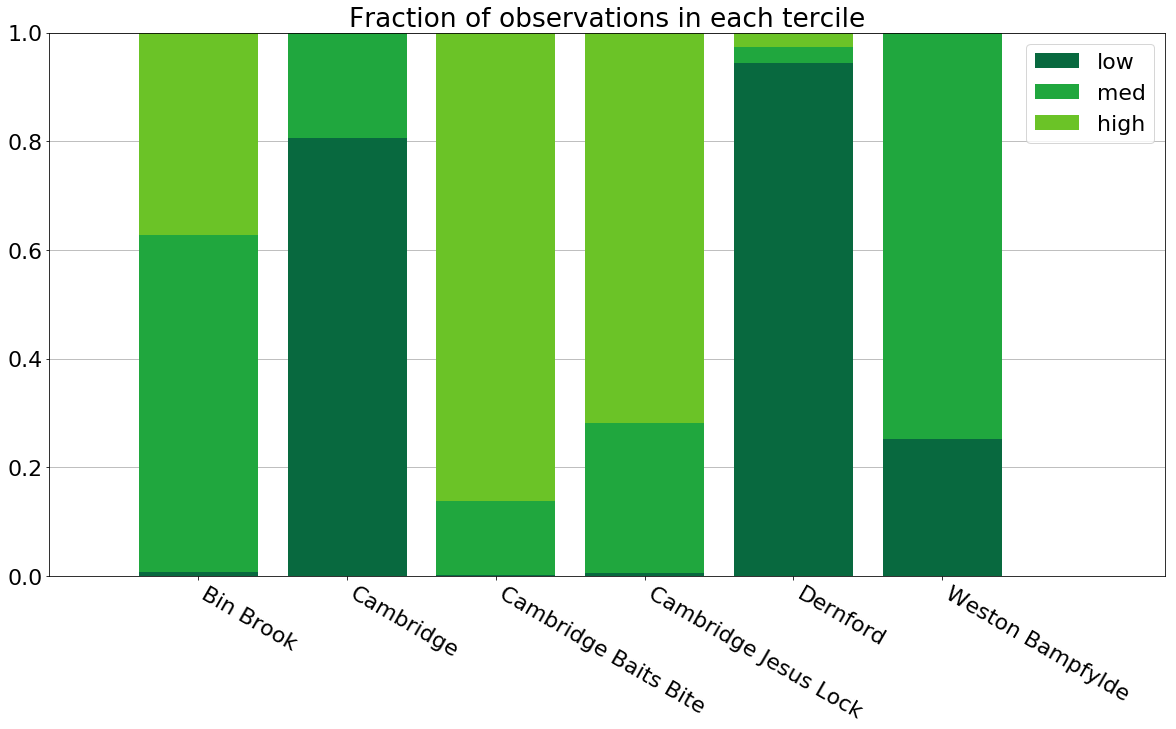

In [338]:
print(b)
x = b['label']
plt.gca().get_yaxis().grid(zorder=3)
plt.gca().set_axisbelow(True)
plt.gca().set_xlim((-1, 6.5))
low = plt.bar(x, b['low'],bottom = 0, align = 'center', color='#08693f')
med = plt.bar(x, b['med'], bottom=b['low'], align = 'center', color='#20a73e')
high = plt.bar(x, b['high'], bottom=b['med'] + b['low'],align = 'center',color='#6bc327')
plt.legend((low[0],med[0],high[0]),('low','med','high'))
plt.xticks(x, rotation=-30, ha='left')  
plt.title('Fraction of observations in each tercile')
matplotlib.rcParams.update({'font.size': 22})
print(plt.gca().get_xlim())
# plt.rcParams["figure.figsize"] = [20,10]
plt.show()


**Question 9.** Reproduce this plot:

![Water levels over time with reference](res/ass3_q9_v2.png)


The light shaded area shows the range from `low` to `high` for each station. The dark shaded area shows the inter-tercile range, `low+tercile1*(high-low)` to `low+tercile2*(high-low)` where `tercile1` and `tercile2` are your answers to Question 4. They can be plotted with [`ax.axhspan`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhspan.html#matplotlib.axes.Axes.axhspan).
Here are some code snippets for working with datetimes that may be helpful.
```
# Create a column with datetime objects
import datetime, pytz
def as_datetime(s): return datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC)
flood['datetime'] = np.vectorize(as_datetime)(flood['t'])

# Date-axis control, taken from http://matplotlib.org/examples/api/date_demo.html
# Given a matplotlib axis, print out date labels nicely
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO, tz=pytz.UTC))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator(tz=pytz.UTC))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%a %d %b'))
# then, at the end,
fig.autofmt_xdate(bottom=0.2, rotation=-30, ha='left')
```

<div class="alert alert-info">
Update on 2017-12-05: Fixed the dark-shaded areas, which had previously been plotted in the wrong place.
</div>

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


ValueError: the 'axes' parameter is not supported in the pandas implementation of transpose()

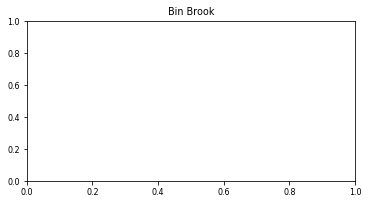

In [394]:
# Create a column with datetime objects
import datetime, pytz
def as_datetime(s): return datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC)
flood['datetime'] = np.vectorize(as_datetime)(flood['t'])
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 8})
# Date-axis control, taken from http://matplotlib.org/examples/api/date_demo.html
# Given a matplotlib axis, print out date labels nicely
locations = b['label'].unique().tolist()
# print(flood[['datetime','value']].loc[flood['label']==locations[0]])
# print(flood[['value']].loc[flood['label']==locations[i]].unstack().tolist())

for i in range(len(locations)):
    ax = fig.add_subplot(3,3,i+1)
    ax.title.set_text(locations[i])
#     ax.plot(dates, flood[['value']].loc[flood['label']==locations[i]].unstack().tolist())
    dates = flood[['datetime']].loc[flood['label']==locations[i]].unstack().tolist()
    
    ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO, tz=pytz.UTC))
    ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator(tz=pytz.UTC))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%a %d %b'))
    ax.plot(dates, flood[['value']].loc[flood['label']==locations[i]].unstack().tolist())
    
    
# then, at the end,
fig.autofmt_xdate(bottom=0.2, rotation=-30, ha='left')